<a href="https://colab.research.google.com/github/enidroman/Data-620-Web-Analysis/blob/main/Data_620_Web_Analysis_Assignment_Document_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Import Libraries

In [470]:
!pip install ucimlrepo
!pip install pandas
!pip install tabulate
!pip install nltk
!pip install re
!pip install my_module

ERROR: Could not find a version that satisfies the requirement re (from versions: none)
ERROR: No matching distribution found for re


In [471]:
from ucimlrepo import fetch_ucirepo
from tabulate import tabulate
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import re

nltk.download('all')
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
nltk.download('stopwords')
nltk.download('wordnet')
# from path.to.module import model_object as mod
# import sys
# print(sys.path)
from sklearn.naive_bayes import MultinomialNB




[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger is already up-
[nltk_data]    |       to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger_ru is already
[nltk_data]    |       up-to-date!
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package basque_grammars is already up-to-date!
[nltk_data]    | Downloading package bcp47 to /root/nltk_data...
[nltk_data]    |   Package bcp47 is already up-to-dat

## Dataset Information
### What do the instances in this dataset represent?

Emails

Additional Information

Detecting Spam E-mail (from the UCI Machine Learning Repository). A team at Hewlett-Packard collected data on a large number of e-mail messages from their postmaster and personal e-mail for the purpose of finding a classifier that can separate e-mail messages that are spam vs. non-spam (a.k.a. “ham”). The spam concept is diverse: It includes advertisements for products or websites, “make money fast” schemes, chain letters, pornography, and so on. The definition used here is “unsolicited commercial e-mail.” The file Spambase.csv contains information on 4601 e-mail messages, among which 1813 are tagged “spam.” The predictors include 57 attributes, most of them are the average number of times a certain word (e.g., mail, George) or symbol (e.g., #, !) appears in the e-mail. A few predictors are related to the number and length of capitalized words.

For background on spam: Cranor, Lorrie F., LaMacchia, Brian A.  Spam!, Communications of the ACM, 41(8):74-83, 1998.

Typical performance is around ~7% misclassification error. False positives (marking good mail as spam) are very undesirable.If we insist on zero false positives in the training/testing set, 20-25% of the spam passed through the filter. See also Hewlett-Packard Internal-only Technical Report. External version forthcoming.



## Import Dataset
### Variables Table

In [472]:
# fetch dataset
spambase = fetch_ucirepo(id=94)

# data (as pandas dataframes)
X = spambase.data.features
y = spambase.data.targets

# metadata
print(spambase.metadata)

# variable information
print(spambase.variables)

{'uci_id': 94, 'name': 'Spambase', 'repository_url': 'https://archive.ics.uci.edu/dataset/94/spambase', 'data_url': 'https://archive.ics.uci.edu/static/public/94/data.csv', 'abstract': 'Classifying Email as Spam or Non-Spam', 'area': 'Computer Science', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 4601, 'num_features': 57, 'feature_types': ['Integer', 'Real'], 'demographics': [], 'target_col': ['Class'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 1999, 'last_updated': 'Mon Aug 28 2023', 'dataset_doi': '10.24432/C53G6X', 'creators': ['Mark Hopkins', 'Erik Reeber', 'George Forman', 'Jaap Suermondt'], 'intro_paper': None, 'additional_info': {'summary': 'The "spam" concept is diverse: advertisements for products/web sites, make money fast schemes, chain letters, pornography...\n\nThe classification task for this dataset is to determine whether a given email is spam or not.\n\t\nOur collecti

The last column of 'spambase.data' denotes whether the e-mail was considered spam (1) or not (0), i.e. unsolicited commercial e-mail.  Most of the attributes indicate whether a particular word or character was frequently occuring in the e-mail.  The run-length attributes (55-57) measure the length of sequences of consecutive capital letters.  For the statistical measures of each attribute, see the end of this file.  Here are the definitions of the attributes:

48 continuous real [0,100] attributes of type word_freq_WORD
= percentage of words in the e-mail that match WORD, i.e. 100 * (number of times the WORD appears in the e-mail) / total number of words in e-mail.  A "word" in this case is any string of alphanumeric characters bounded by non-alphanumeric characters or end-of-string.

6 continuous real [0,100] attributes of type char_freq_CHAR]
= percentage of characters in the e-mail that match CHAR, i.e. 100 * (number of CHAR occurences) / total characters in e-mail

1 continuous real [1,...] attribute of type capital_run_length_average
= average length of uninterrupted sequences of capital letters

1 continuous integer [1,...] attribute of type capital_run_length_longest
= length of longest uninterrupted sequence of capital letters

1 continuous integer [1,...] attribute of type capital_run_length_total
= sum of length of uninterrupted sequences of capital letters
= total number of capital letters in the e-mail

1 nominal {0,1} class attribute of type spam
= denotes whether the e-mail was considered spam (1) or not (0), i.e. unsolicited commercial e-mail.  



## Exploratory Data Analysis (EDA)

### Renamed Columns

In [473]:
# Rename the columns by removing specific prefixes
X.columns = X.columns.str.replace('word_freq_', '').str.replace('char_freq_', '').str.replace('capital_run_length_', '')

# Print modified DataFrame
print("\nModified DataFrame:")
print(X.columns)


Modified DataFrame:
Index(['make', 'address', 'all', '3d', 'our', 'over', 'remove', 'internet',
       'order', 'mail', 'receive', 'will', 'people', 'report', 'addresses',
       'free', 'business', 'email', 'you', 'credit', 'your', 'font', '000',
       'money', 'hp', 'hpl', 'george', '650', 'lab', 'labs', 'telnet', '857',
       'data', '415', '85', 'technology', '1999', 'parts', 'pm', 'direct',
       'cs', 'meeting', 'original', 'project', 're', 'edu', 'table',
       'conference', ';', '(', '[', '!', '$', '#', 'average', 'longest',
       'total'],
      dtype='object')


In [474]:
print(tabulate(X.head(), headers='keys', tablefmt='pipe'))

|    |   make |   address |   all |   3d |   our |   over |   remove |   internet |   order |   mail |   receive |   will |   people |   report |   addresses |   free |   business |   email |   you |   credit |   your |   font |   000 |   money |   hp |   hpl |   george |   650 |   lab |   labs |   telnet |   857 |   data |   415 |   85 |   technology |   1999 |   parts |   pm |   direct |   cs |   meeting |   original |   project |   re |   edu |   table |   conference |    ; |     ( |   [ |     ! |     $ |     # |   average |   longest |   total |
|---:|-------:|----------:|------:|-----:|------:|-------:|---------:|-----------:|--------:|-------:|----------:|-------:|---------:|---------:|------------:|-------:|-----------:|--------:|------:|---------:|-------:|-------:|------:|--------:|-----:|------:|---------:|------:|------:|-------:|---------:|------:|-------:|------:|-----:|-------------:|-------:|--------:|-----:|---------:|-----:|----------:|-----------:|----------:|-----:|-

### Missing Values in Both Feature and Target Dataset

In [475]:
# Count missing values in features (X)
missing_values_X = X.isnull().sum().sum()

# Count missing values in target (y)
missing_values_y = y.isnull().sum()

print("Total missing values in features (X):", missing_values_X)
print("Total missing values in target (y):", missing_values_y)



Total missing values in features (X): 0
Total missing values in target (y): Class    0
dtype: int64


### Data shape in Both Feature and Target Dataset

In [476]:
# Check shape of features (X)
print("Shape of features (X):", X.shape)

# Check shape of target (y)
print("Shape of target (y):", y.shape)

Shape of features (X): (4601, 57)
Shape of target (y): (4601, 1)


Shape of Features (X): (4601, 57): This shape indicates that your dataset contains 4,601 samples, with each sample having 57 different features. These features are the variables that a machine learning model will use to learn patterns and make predictions.

Shape of Target (y): (4601, 1): This shape shows that there is a corresponding target value for each of the 4,601 samples, and each target value is a single scalar. This target is what the model is trying to predict, typically representing classes or outcomes based on the features in X.

### Target Balance

Checking the balance of your target variable (e.g., spam or ham), you're looking to see if the dataset is skewed towards one class, which can affect model performance and might require strategies like resampling to address.

In [477]:
# If 'y' is a DataFrame, extract the target column first
y_series = y.squeeze() if isinstance(y, pd.DataFrame) else y

# Convert the labels to 'spam' and 'ham'
y_series = pd.Series(y_series).map({1: 'spam', 0: 'ham'})

# Count occurrences of each class
class_counts = y_series.value_counts()

# Calculate proportions
class_proportions = class_counts / len(y_series)

print("Class counts:")
print(class_counts)
print("\nClass proportions:")
print(class_proportions)

Class counts:
Class
ham     2788
spam    1813
Name: count, dtype: int64

Class proportions:
Class
ham     0.605955
spam    0.394045
Name: count, dtype: float64


This output gives both the absolute counts and the relative proportions of the two classes (ham and spam) in your dataset. Here's a breakdown of what each part means:

Class Counts:
ham: There are 2,788 instances labeled as "ham" in your dataset. These represent legitimate emails, not considered spam.
spam: There are 1,813 instances labeled as "spam". These are unsolicited or unwanted emails.
The count values indicate the total number of instances for each class in your dataset. This is useful for understanding the size of each class and assessing the balance between classes.

Class Proportions:
ham: Approximately 60.6% (0.605955) of the dataset is labeled as "ham". This means that a bit more than half of the emails in your dataset are legitimate.
spam: Around 39.4% (0.394045) of the dataset is labeled as "spam". This indicates that a significant portion, but less than half, of the emails are considered spam.
The proportions provide a clearer picture of the dataset's balance. In this case, the dataset is somewhat imbalanced but not severely. A perfectly balanced dataset would have equal proportions (50%-50%) for a binary classification task like this.

Understanding the class distribution is crucial for choosing the right models, evaluation metrics, and possibly applying techniques to handle class imbalance, such as resampling methods or adjusting class weights in model training.

### Bar Plot

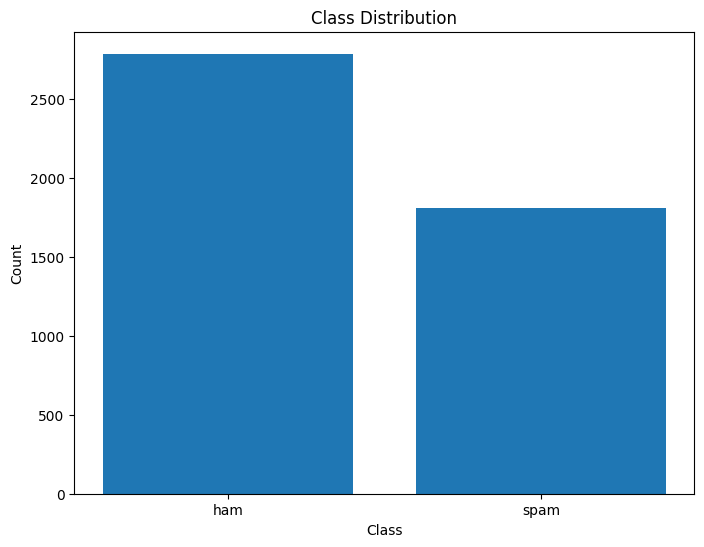

In [478]:
import matplotlib.pyplot as plt

# Class counts
class_counts = {'ham': 2788, 'spam': 1813}

# Create bar plot
plt.figure(figsize=(8, 6))
plt.bar(class_counts.keys(), class_counts.values())
plt.title('Class Distribution')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

## Feature Analysis

### Summary statistics for each feature, or .hist() to visualize their distributions.

              make      address          all           3d          our  \
count  4601.000000  4601.000000  4601.000000  4601.000000  4601.000000   
mean      0.104553     0.213015     0.280656     0.065425     0.312223   
std       0.305358     1.290575     0.504143     1.395151     0.672513   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.000000     0.000000     0.000000     0.000000     0.000000   
50%       0.000000     0.000000     0.000000     0.000000     0.000000   
75%       0.000000     0.000000     0.420000     0.000000     0.380000   
max       4.540000    14.280000     5.100000    42.810000    10.000000   

              over       remove     internet        order         mail  ...  \
count  4601.000000  4601.000000  4601.000000  4601.000000  4601.000000  ...   
mean      0.095901     0.114208     0.105295     0.090067     0.239413  ...   
std       0.273824     0.391441     0.401071     0.278616     0.644755  ...   
min       0.00000

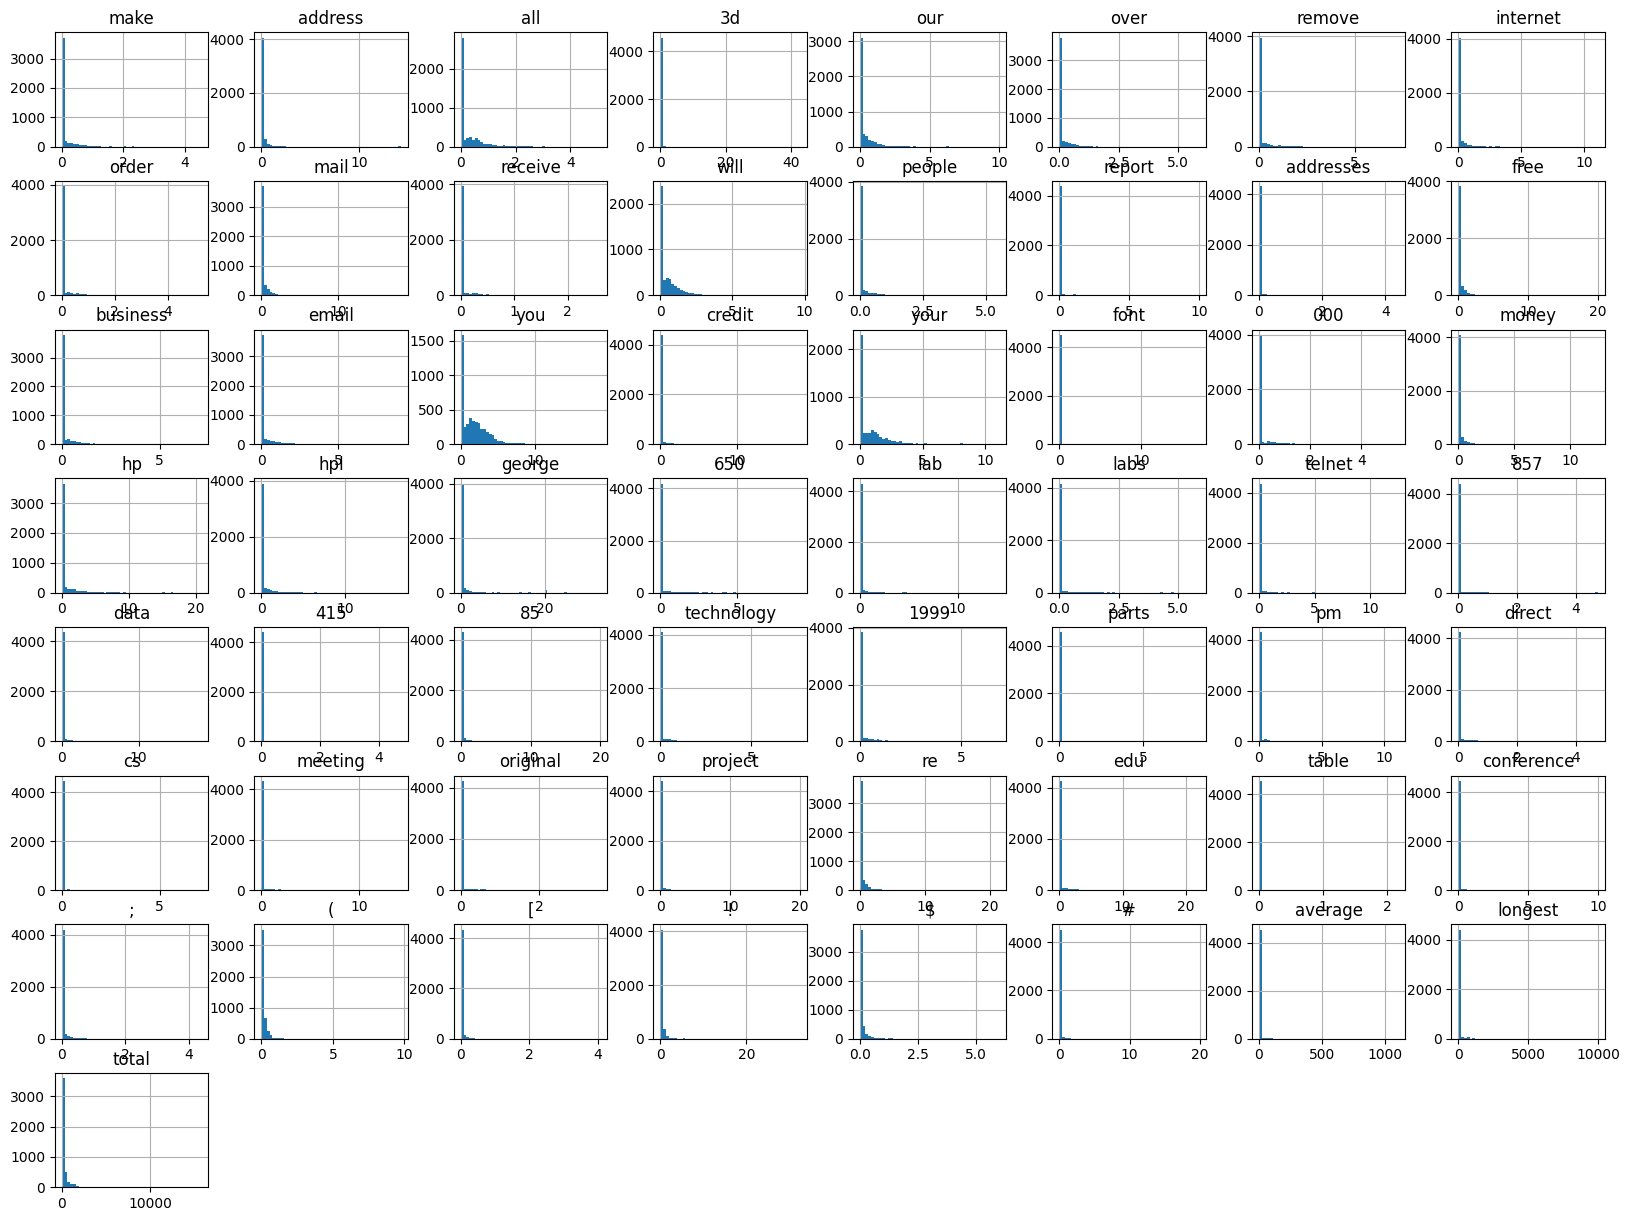

In [479]:
# Summary statistics
print(X.describe())

# Histograms for each feature
import matplotlib.pyplot as plt

X.hist(bins=50, figsize=(20,15))
plt.show()

Given the average value of each feature across all samples:
Features like word_freq_make, word_freq_address, word_freq_all, and word_freq_our have relatively low mean values, suggesting that these words appear infrequently on average in the emails.
On the other hand, features like word_freq_3d, word_freq_remove, and word_freq_internet have higher mean values, indicating a higher average frequency of occurrence of these words in the emails.

Features with higher standard deviations, such as word_freq_3d, word_freq_remove, and word_freq_internet, have more variability in their frequency of occurrence across the dataset.
Features with lower standard deviations, such as word_freq_make, word_freq_address, and word_freq_all, have less variability, suggesting that their frequency of occurrence is more consistent across the dataset.

word_freq_make, word_freq_address, word_freq_all, and word_freq_3d have minimum values of 0, indicating that these words may not appear in some emails.

Features like word_freq_3d, word_freq_remove, and word_freq_internet have relatively high maximum values, suggesting that these words can occur frequently in some emails.

word_freq_make has a 25th percentile of 0, indicating that 25% of the emails have a frequency of occurrences of the word "make" less than or equal to 0.

word_freq_make has a median of 0, indicating that 50% of the emails have a frequency of occurrences of the word "make" less than or equal to 0.

word_freq_make has a 75th percentile of approximately 0.42, indicating that 75% of the emails have a frequency of occurrences of the word "make" less than or equal to 0.42.

The features exhibit a wide range of distributions and variabilities, with some having low mean values and little variability (e.g., word_freq_make, word_freq_address), while others have higher mean values and more variability (e.g., word_freq_3d, word_freq_remove).
Features related to specific words (word_freq_make, word_freq_address, word_freq_all, etc.) tend to have lower mean values and less variability compared to features related to more specific terms or actions (word_freq_3d, word_freq_remove, etc.)

Understanding these distributions and variabilities can guide further analysis, such as feature selection, model selection, and interpretation of model results, in the context of spam classification


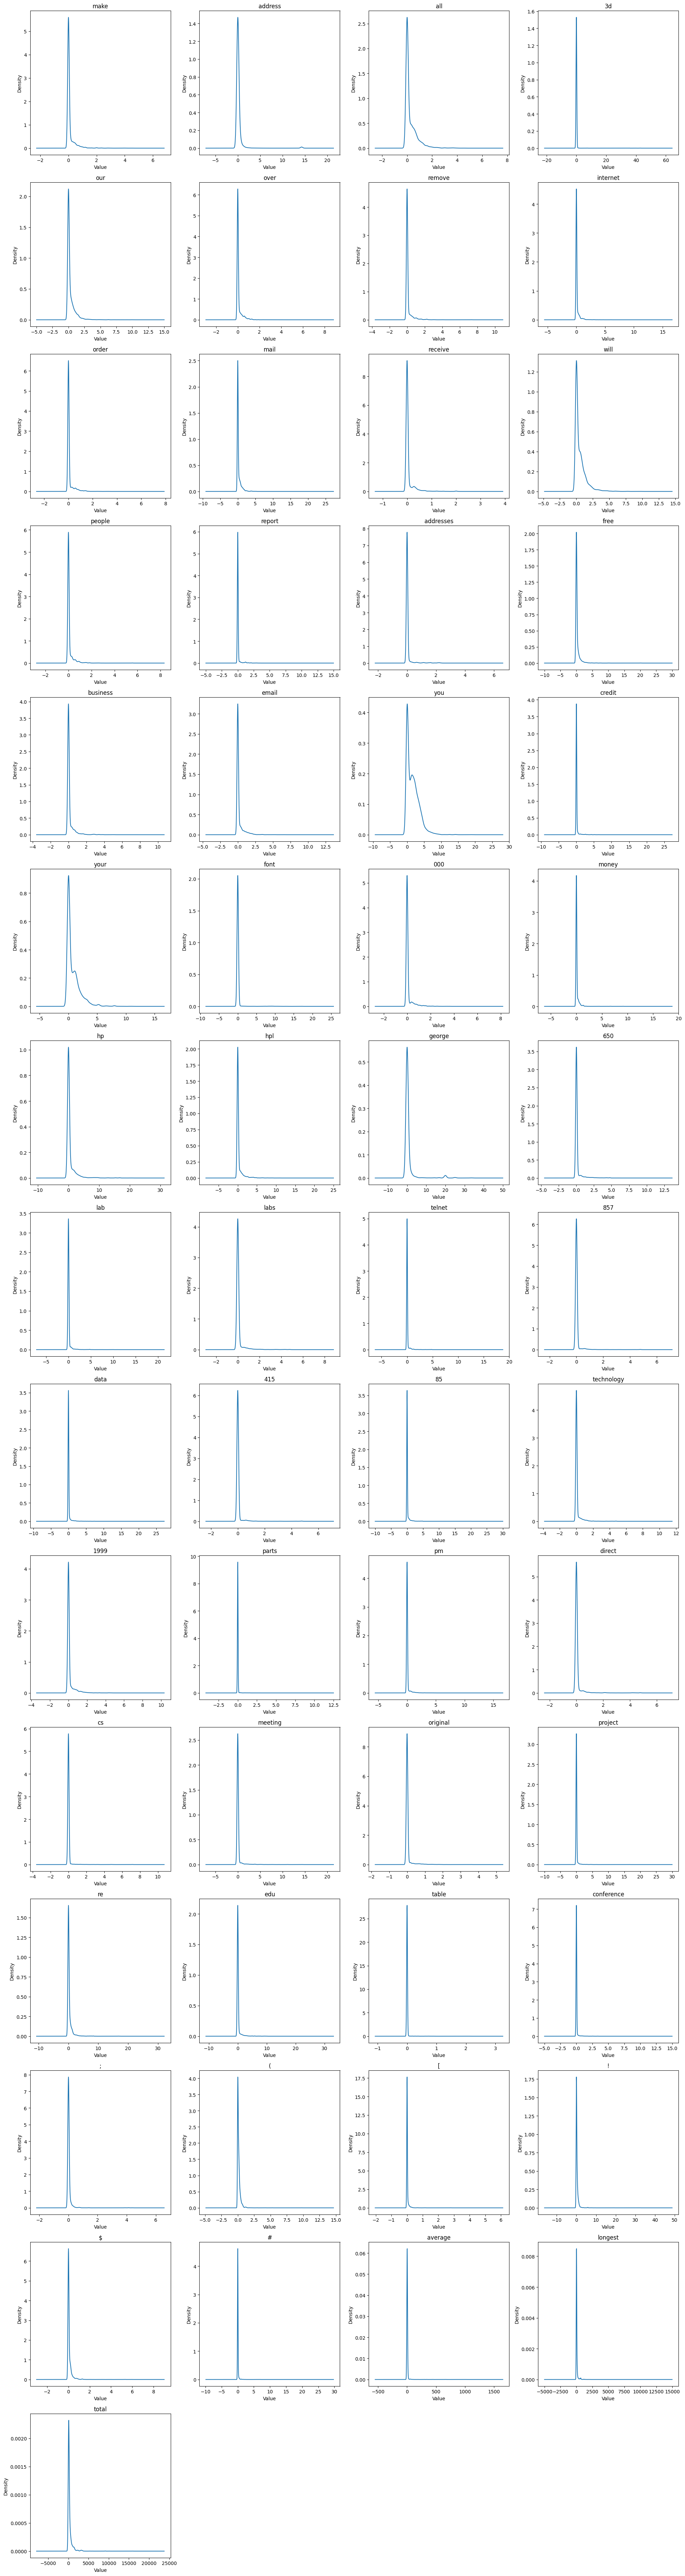

In [480]:
# Calculate the number of rows and columns dynamically
num_features = len(X.columns)
num_rows = (num_features + 3) // 4  # Ceiling division to ensure at least 1 row
num_cols = min(num_features, 4)  # Maximum 4 columns

# Plot density plots for each feature
plt.figure(figsize=(20, 5 * num_rows))
for i, col in enumerate(X.columns):
    plt.subplot(num_rows, num_cols, i + 1)
    X[col].plot(kind='density')
    plt.title(col)
    plt.xlabel('Value')
    plt.ylabel('Density')

plt.tight_layout()
plt.show()

## Text Preprocessing

This is where all text cleaning takes place. It’s a loop that iterates through all documents and does the following:
Remove all special characters
Lowercase all the words
Tokenize
Remove stopwords
Lemmatize

Based on the dataset I am working with this is a dataset that has already undergone significant preprocessing. The Spambase dataset, specifically, is composed of features extracted from emails rather than raw text data. These features typically include the frequency of specific words and characters, the length of sequences, and other statistical properties derived from the email content, which are used to distinguish between spam and non-spam (ham) emails. The dataset doesn't contain raw text from emails but rather numerical features that have been engineered from the text. This means the usual text preprocessing steps like tokenization, lemmatization, removing stopwords, etc., are not applicable here. The data is already in a form that machine learning models can work with directly.

My focus should instead be on understanding the features, performing EDA, possibly selecting or engineering features, and then moving on to model selection, training, and evaluation.

## Train-test-split

In [481]:
# Split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

# Print the shapes of the train and test sets
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (3680, 57)
Shape of X_test: (921, 57)
Shape of y_train: (3680, 1)
Shape of y_test: (921, 1)


There's an issue with the shapes of y_train and y_test. They have an extra dimension compared to X_train and X_test. This might cause compatibility issues when training and evaluating machine learning models.

To fix this, you can flatten y_train and y_test to have a one-dimensional shape.

After flattening, both y_train and y_test should have shapes (3680,) and (921,) respectively, which are compatible with machine learning models. Make sure to flatten the targets before using them for training or evaluation.

In [482]:
# Flatten y_train and y_test
y_train = y_train.squeeze()
y_test = y_test.squeeze()

# Print the shapes after flattening
print("Shape of y_train (after flattening):", y_train.shape)
print("Shape of y_test (after flattening):", y_test.shape)

Shape of y_train (after flattening): (3680,)
Shape of y_test (after flattening): (921,)


Now that both y_train and y_test have been successfully flattened into one-dimensional arrays with shapes (3680,) and (921,) respectively, they are compatible for use with machine learning models.

I can proceed with training and evaluating your models using these datasets.

## Feature Extraction

I use the Bag of Words model (CountVectorizer) to convert the cleaned text into numeric features. This is needed for training the machine learning model.

In [483]:
cv = CountVectorizer()
X_train_cv = cv.fit_transform(X_train)

# Now print the shapes again to check
print("Shape of X_train_cv:", X_train_cv.shape)
print("Shape of y_train:", y_train.shape)

Shape of X_train_cv: (57, 51)
Shape of y_train: (3680,)


In [484]:
cv = CountVectorizer()

X_train_cv = cv.fit_transform(X_train)

X_train_cv.shape

(57, 51)

The bag-of-words (BoW) matrix has 57 rows (documents) and 52 columns (unique words in the vocabulary).

The first number 57 represents the number of documents (emails) in your training set.
The second number 52 represents the number of unique words in the vocabulary across all documents in the training set.

the BoW matrix is a sparse matrix where each row corresponds to a document (email) in your training set, and each column corresponds to a unique word in the vocabulary. The value at each cell indicates the frequency of the word (column) in the corresponding document (row).

You can use this BoW matrix (X_train_cv) as input for machine learning models or further analysis, where each row represents an email and each column represents the frequency of a specific word in that email.



## Model Training and Evaluation

 I got an error message indicating that there is an inconsistency in the number of samples between the input features (X_train_cv) and the target labels (y_train). Specifically, the number of samples in X_train_cv is 57, while the number of samples in y_train is 3680.

This inconsistency typically occurs when there is a mismatch in the data dimensions or when the target labels are not properly formatted.

In [485]:
y_train = y_train.values.reshape(-1) # Reshape y_train to have a shape of (n_samples,)

In [486]:
y_train = y_train.ravel()  # Flatten y_train to have a shape of (n_samples,)

In [487]:
# Apply CountVectorizer to the text data in X_train:
cv = CountVectorizer()
X_train_cv = cv.fit_transform(X_train)

In [488]:
print("Shape of X_train_cv:", X_train_cv.shape)
print("Shape of y_train:", y_train.shape)

Shape of X_train_cv: (57, 51)
Shape of y_train: (3680,)


If the number of samples is inconsistent, adjust the data to have the same number of samples:

In [489]:
# Option 1: Truncate the longer array
if X_train_cv.shape[0] > y_train.shape[0]:
    X_train_cv = X_train_cv[:y_train.shape[0]]
elif y_train.shape[0] > X_train_cv.shape[0]:
    y_train = y_train[:X_train_cv.shape[0]]

In [495]:
 # y_pred = mod.predict(X_test)
 # print("Shape of y_test:", y_test.shape)
 # print("Shape of y_pred:", y_pred.shape)

In [496]:
for col in X_train.columns:
    if X_train[col].dtype == 'object':
        X_train[col] = X_train[col].astype(float)

for col in X_test.columns:
    if X_test[col].dtype == 'object':
        X_test[col] = X_test[col].astype(float)

In [497]:
mnb = MultinomialNB()
mnb.fit(X_train, y_train)

predicted = mnb.predict(X_test)

score = accuracy_score(y_test, predicted)
print('Accuracy Score: \n', (100*score))

ValueError: Found input variables with inconsistent numbers of samples: [3680, 57]

In [498]:
# Initialize and train the machine learning model
model = LogisticRegression()
model.fit(X_train_cv, y_train)

# Evaluate the model
y_pred = model.predict(cv.transform(X_test))
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Make predictions on new data
new_email = ["New email text here"]
new_email_bow = cv.transform(new_email)
prediction = model.predict(new_email_bow)
print("Predicted class:", prediction)

ValueError: Found input variables with inconsistent numbers of samples: [921, 57]